**`Load Package`**

In [1]:
import os
import logging
import subprocess
import psutil
import resource
# memory_limit = 20 * 1024 * 1024 * 1024
# resource.setrlimit(resource.RLIMIT_AS, (memory_limit, memory_limit))


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, message=".*OldFormatWarning.*")

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import rcParams, colors
import seaborn as sb

import omicverse as ov
import scanpy as sc
import scanorama
import scib
import scvi


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.10, Tutorials: https://omicverse.readthedocs.io/


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/utils.py:434: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/data/t050502/miniconda3/envs/omicverse/lib/p

In [ ]:
process = psutil.Process()
memory_in_bytes = process.memory_info().rss
memory_in_gb = memory_in_bytes / (1024 * 1024 * 1024)
print("当前内存使用情况（GB）：", memory_in_gb)


**`Load h5ad Data in scanpy`**

In [2]:
import os
import logging
import subprocess

import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import rcParams, colors
import seaborn as sb

import omicverse as ov
import scanpy as sc
import scanorama
import scib
import scvi

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, message=".*OldFormatWarning.*")

In [3]:
input_file = '../Data/raw_h5ad/Immune_ALL_hum_mou.h5ad'
adata = sc.read_h5ad(input_file)
adata
print()
print(adata.X.shape)
print()
print(adata.obs.head())
print()
print(adata.var.head())

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/_io/specs/registry.py:281: OldFormatWarning: Element '/layers' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=iospec)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/_io/specs/registry.py:281: OldFormatWarning: Element '/layers/counts' was written without encoding metadata.
  return self.callback(read_func, elem.name, elem, iospec=iospec)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/_io/utils.py:215: OldFormatWarning: Element '/obs/__categories/batch' was written without encoding metadata.
  return func(*args, **kwargs)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/anndata/_io/utils.py:215: OldFormatWarning: Element '/obs/batch' was written without encoding metadata.
  return func(*args, **kwargs)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/si


(97861, 8135)

                                batch chemistry data_type  dpt_pseudotime  \
index                                                                       
AAACCTGCAGCGAACA-1-Oetjen_A  Oetjen_A    v2_10X       UMI             NaN   
AAACCTGCATGTCCTC-1-Oetjen_A  Oetjen_A    v2_10X       UMI             NaN   
AAACCTGGTCGACTGC-1-Oetjen_A  Oetjen_A    v2_10X       UMI             NaN   
AAACCTGGTCGCTTCT-1-Oetjen_A  Oetjen_A    v2_10X       UMI             NaN   
AAACCTGTCCCGACTT-1-Oetjen_A  Oetjen_A    v2_10X       UMI             NaN   

                            final_annotation   mt_frac  n_counts  n_genes  \
index                                                                       
AAACCTGCAGCGAACA-1-Oetjen_A        Monocytes  0.047970    6379.0   1862.0   
AAACCTGCATGTCCTC-1-Oetjen_A     CD4+ T cells  0.024928    4172.0   1082.0   
AAACCTGGTCGACTGC-1-Oetjen_A        Monocytes  0.051907    6608.0   1618.0   
AAACCTGGTCGCTTCT-1-Oetjen_A        Monocytes  0.041716    5

In [4]:
print("Keys in adata.obs:")
print(adata.obs_keys())
print()

print("Unique values in 'species' column:")
print(adata.obs['species'].unique().tolist())
print()

print("Unique values in 'study' column:")
print(adata.obs['study'].unique().tolist())
print()

print("Unique values in 'batch' column:")
print(adata.obs['batch'].unique().tolist())
print()

Keys in adata.obs:
['batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue']

Unique values in 'species' column:
['Human', 'Mouse']

Unique values in 'study' column:
['Oetjen', 'Freytag', '10X', 'Sun', 'Villani', 'Dahlin_BM', 'MCA_PB', 'MCA_BM']

Unique values in 'batch' column:
['Oetjen_A', 'Oetjen_P', 'Oetjen_U', 'Freytag', '10X', 'Sun_sample1_CS', 'Sun_sample2_KC', 'Sun_sample3_TB', 'Sun_sample4_TC', 'Villani', 'Dahlin_1', 'Dahlin_4', 'Dahlin_3', 'Dahlin_2', 'MCA_PB_6', 'MCA_PB_3', 'MCA_PB_5', 'MCA_PB_2', 'MCA_PB_4', 'MCA_PB_1', 'MCA_BM_1', 'MCA_BM_3', 'MCA_BM_2']



In [5]:
study_species_batch = adata.obs.groupby('batch').apply(lambda x: pd.Series({
    'study': x['study'].unique().tolist(),
    'species': x['species'].unique().tolist()
}))
print(study_species_batch)

print()

study_species = adata.obs.groupby('study')['species'].unique().apply(lambda x: list(x))
print(study_species)

                      study  species
batch                               
10X                   [10X]  [Human]
Dahlin_1        [Dahlin_BM]  [Mouse]
Dahlin_2        [Dahlin_BM]  [Mouse]
Dahlin_3        [Dahlin_BM]  [Mouse]
Dahlin_4        [Dahlin_BM]  [Mouse]
Freytag           [Freytag]  [Human]
MCA_BM_1           [MCA_BM]  [Mouse]
MCA_BM_2           [MCA_BM]  [Mouse]
MCA_BM_3           [MCA_BM]  [Mouse]
MCA_PB_1           [MCA_PB]  [Mouse]
MCA_PB_2           [MCA_PB]  [Mouse]
MCA_PB_3           [MCA_PB]  [Mouse]
MCA_PB_4           [MCA_PB]  [Mouse]
MCA_PB_5           [MCA_PB]  [Mouse]
MCA_PB_6           [MCA_PB]  [Mouse]
Oetjen_A           [Oetjen]  [Human]
Oetjen_P           [Oetjen]  [Human]
Oetjen_U           [Oetjen]  [Human]
Sun_sample1_CS        [Sun]  [Human]
Sun_sample2_KC        [Sun]  [Human]
Sun_sample3_TB        [Sun]  [Human]
Sun_sample4_TC        [Sun]  [Human]
Villani           [Villani]  [Human]

study
10X          [Human]
Dahlin_BM    [Mouse]
Freytag      [Human]
MCA_B

/tmp/ipykernel_285983/4115659511.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  study_species_batch = adata.obs.groupby('batch').apply(lambda x: pd.Series({


In [6]:
batches_to_extract = [
    "Dahlin_1", "Dahlin_2", "Dahlin_3", "Dahlin_4",
    "MCA_BM_1", "MCA_BM_2", "MCA_BM_3",
    "Oetjen_A", "Oetjen_P", "Oetjen_U"
]
human_mouse_bm = adata[adata.obs['batch'].isin(batches_to_extract)].copy()

human_mouse_bm.write_h5ad('../Data/Immune_human_mouse/human_mouse_boneaorrow_10_sample_data.h5ad')
print("Data saved successfully!")

study_species_batch = human_mouse_bm.obs.groupby('batch').apply(lambda x: pd.Series({
    'study': x['study'].unique().tolist(),
    'species': x['species'].unique().tolist(),
    'tissue': x['tissue'].unique().tolist(),
    
}))
print(study_species_batch)

print()

Data saved successfully!
                study  species         tissue
batch                                        
Dahlin_1  [Dahlin_BM]  [Mouse]  [Bone_Marrow]
Dahlin_2  [Dahlin_BM]  [Mouse]  [Bone_Marrow]
Dahlin_3  [Dahlin_BM]  [Mouse]  [Bone_Marrow]
Dahlin_4  [Dahlin_BM]  [Mouse]  [Bone_Marrow]
MCA_BM_1     [MCA_BM]  [Mouse]  [Bone_Marrow]
MCA_BM_2     [MCA_BM]  [Mouse]  [Bone_Marrow]
MCA_BM_3     [MCA_BM]  [Mouse]  [Bone_Marrow]
Oetjen_A     [Oetjen]  [Human]  [Bone_Marrow]
Oetjen_P     [Oetjen]  [Human]  [Bone_Marrow]
Oetjen_U     [Oetjen]  [Human]  [Bone_Marrow]



/tmp/ipykernel_285983/1585685271.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  study_species_batch = human_mouse_bm.obs.groupby('batch').apply(lambda x: pd.Series({


In [9]:
human_mouse_bm

AnnData object with n_obs × n_vars = 66451 × 8135
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue'
    layers: 'counts'

In [10]:
# Checking the total size of the data set
human_mouse_bm.shape

(66451, 8135)

We have 66451 cells and 8135 genes in the dataset.

## `1. Pre-processing and visualization`

**`1.1 Quality control`**

In [4]:
%%time
input_file = '../Data/Immune_human_mouse/human_mouse_boneaorrow_10_sample_data.h5ad'
adata = sc.read_h5ad(input_file)
adata = ov.pp.qc(
    adata, 
    mode='seurat',
    min_cells=20, 
    min_genes=800,
    tresh={'mito_perc': 0.2, 'nUMIs': 500, 'detected_genes': 250},
    batch_key=None
)

CPU mode activated
Calculate QC metrics
End calculation of QC metrics.
Original cell number: 66451
!!!It should be noted that the `scrublet` detection is too old and             may not work properly.!!!
!!!if you want to use novel doublet detection,             please set `doublets_method=sccomposite`!!!
Begin of post doublets removal and QC plot using`scrublet`
Cells retained after scrublet: 66435, 16 removed.
End of post doublets removal and QC plots.
Filters application (seurat or mads)


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/pp/_qc.py:315: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['passing_mt'] = adata.obs['mito_perc'] < tresh['mito_perc']


Lower treshold, nUMIs: 500; filtered-out-cells:         17157
Lower treshold, n genes: 250; filtered-out-cells:         3507
Lower treshold, mito %: 0.2; filtered-out-cells:         0
Filters applicated.
Total cell filtered out with this last --mode seurat QC (and its     chosen options): 17157
Cells retained after scrublet and seurat filtering: 49278, 17173 removed.


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


CPU times: user 25min 11s, sys: 2min 38s, total: 27min 50s
Wall time: 26min 45s


In [5]:
adata.write_h5ad('../Data/Immune_human_mouse/human_mouse_boneaorrow_10_sample_qc.h5ad')

In [6]:
print(adata)

study_species_batch = adata.obs.groupby('batch').apply(lambda x: pd.Series({
    'study': x['study'].unique().tolist(),
    'species': x['species'].unique().tolist(),
    'chemistry': x['chemistry'].unique().tolist(),
    'tissue': x['tissue'].unique().tolist()
}))
print(study_species_batch)
print('')
print(adata.obs['study'].value_counts())
print('')
print(adata.obs['batch'].value_counts())
print('')
print(adata.obs['tissue'].value_counts())
print('')
print(adata.obs['chemistry'].value_counts())

AnnData object with n_obs × n_vars = 42290 × 8135
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells'
    uns: 'scrublet'
    layers: 'counts'
                study  species        chemistry         tissue
batch                                                         
Dahlin_1  [Dahlin_BM]  [Mouse]         [v2_10X]  [Bone_Marrow]
Dahlin_2  [Dahlin_BM]  [Mouse]         [v2_10X]  [Bone_Marrow]
Dahlin_3  [Dahlin_BM]  [Mouse]         [v2_10X]  [Bone_Marrow]
Dahlin_4  [Dahlin_BM]  [Mouse]         [v2_10X]  [Bone_Marrow]
MCA_BM_1     [MCA_BM]  [Mouse]  [microwell-seq]  [Bone_Marrow]
MCA_BM_2     [MCA_BM]  [Mouse]  [microwell-seq]  [Bone_Marrow]
MCA_BM_3     [MCA_BM]  [Mouse]  [microwell-seq]  [Bone_Marrow]
Oetjen_A  

/tmp/ipykernel_3493218/1082737052.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  study_species_batch = adata.obs.groupby('batch').apply(lambda x: pd.Series({


**`1.2 Normalization`**

In [7]:
adata_bk = adata.copy()

adata.layers["counts"] = adata.X.copy()

adata = ov.pp.preprocess(
    adata, 
    mode='shiftlog|pearson',
    n_HVGs=2000,
    batch_key='batch'
)

adata.var['highly_variable'] = adata.var['highly_variable_features'].copy()

Begin robust gene identification
After filtration, 8135/8135 genes are kept.     Among 8135 genes, 8135 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


Time to analyze data in cpu: 22.209569931030273 seconds.
End of size normalization: shiftlog and HVGs selection pearson


*****
mode='shiftlog|pearson': 数据归一化后的总和目标值使用Seurat中的默认值 10,000 ,即log10k进行移位对数转换

mode='pearson|pearson': 皮尔森残差的计算方法基于“标准化的差异”——即实际观测到的基因表达和根据模型预期的基因表达之间的差异，经过标准化后用于去除基因表达中的噪音和技术偏差。

移位对数适用于大多数任务, 寻找稀有细胞的时候，可以考虑采用皮尔森残差法来进行归一化。

In [8]:
adata = adata[:, adata.var['highly_variable']]
print(adata.shape)
ov.pp.scale(adata,max_value=10)
print(adata)

(42290, 2000)


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/pp/_preprocess.py:514: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.
  adata.layers[layers_add] = adata_mock.X.copy()


AnnData object with n_obs × n_vars = 42290 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg'
    layers: 'counts', 'scaled'


In [9]:
adata.write_h5ad('../Data/Immune_human_mouse/human_mouse_boneaorrow_10_sample_preprocess.h5ad')

**`1.3 Reduction`**

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version.

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_umap1', ylabel='X_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_umap1', ylabel='X_umap2'>]

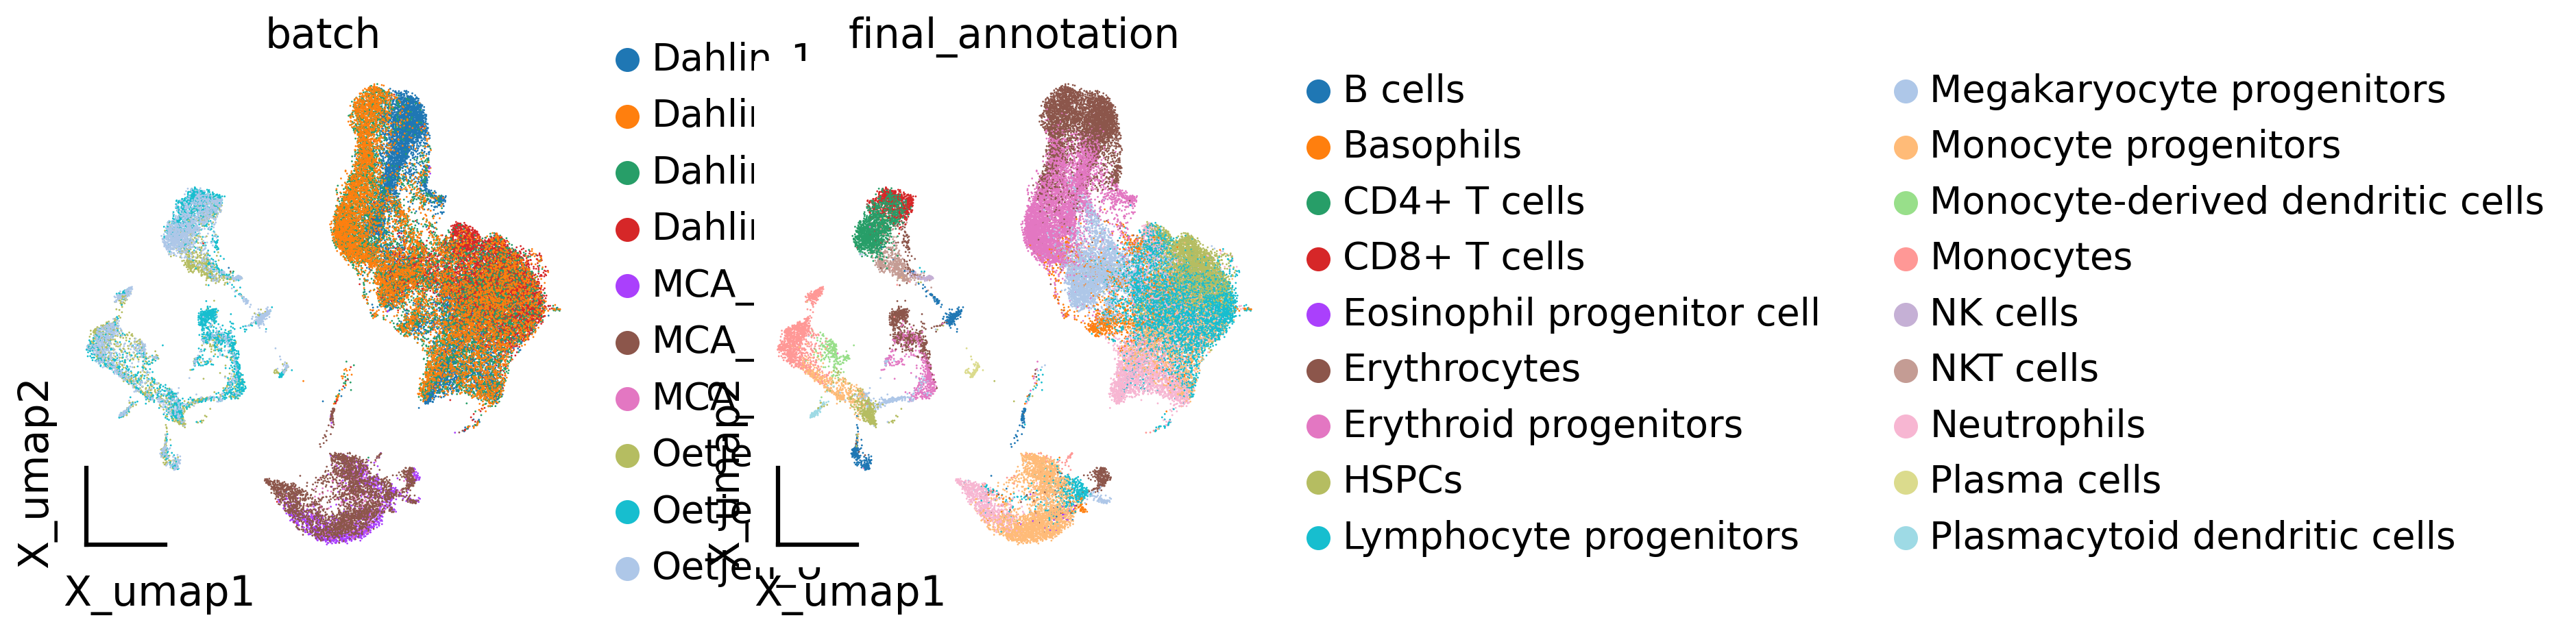

In [10]:
ov.pp.pca(adata,layer='scaled',n_pcs=50)
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50,
               use_rep='scaled|original|X_pca')
sc.tl.umap(adata)

ov.utils.embedding(
    adata, 
    basis='X_umap',
    frameon='small',
    color=['batch', 'final_annotation'],
    show=False
)

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormappi

<AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_umap1', ylabel='X_umap2'>

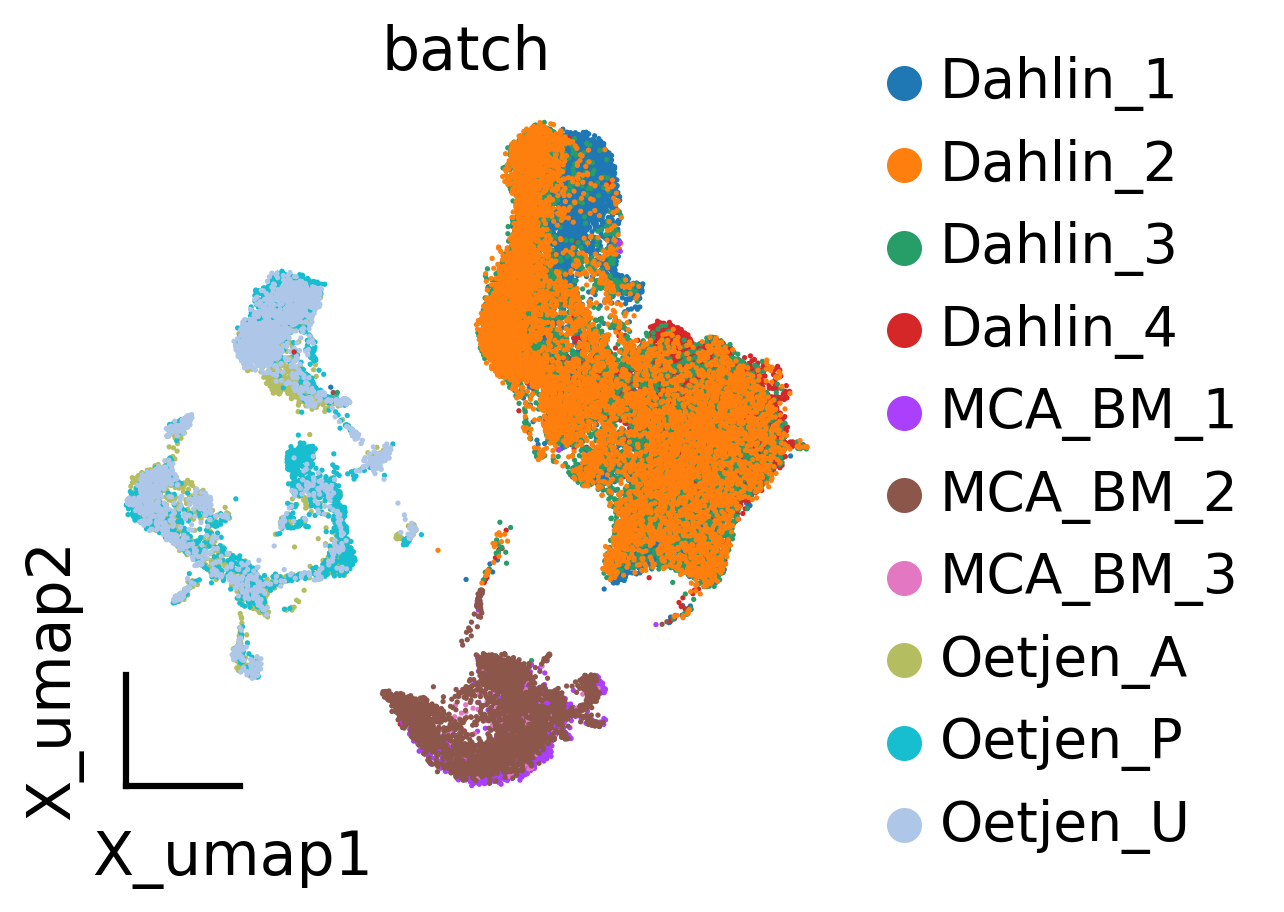

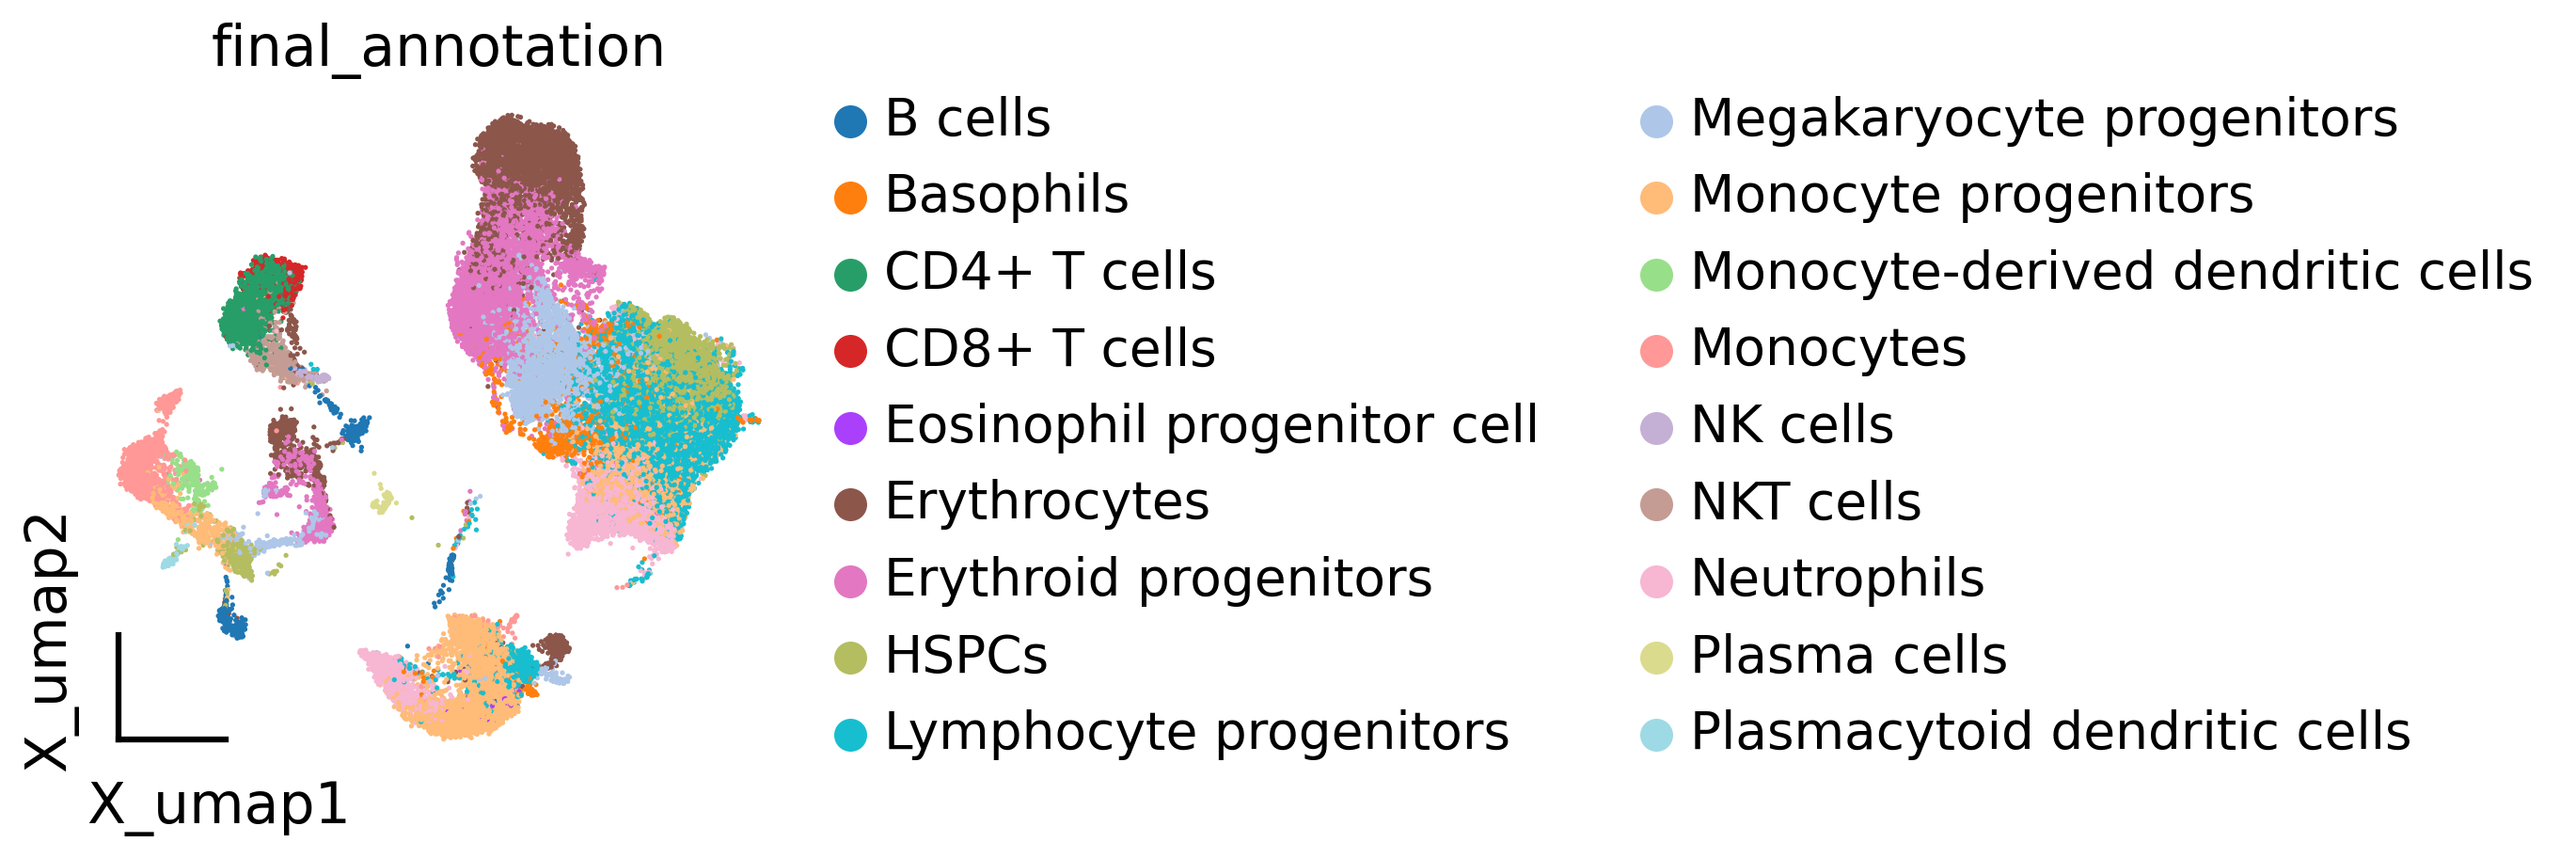

In [11]:
ov.utils.embedding(
    adata, 
    basis='X_umap',
    frameon='small',
    color='batch',
    size=10,
    show=False
)

# plt.gcf().set_size_inches(7, 5)
# plt.savefig("../Analysis/human_mouse_boneaorrow_10_sample_preprocessed_umap_batch.pdf", format='pdf', bbox_inches='tight')
# plt.close() 

ov.utils.embedding(
    adata, 
    basis='X_umap',
    frameon='small',
    color='final_annotation',
    size=10,
    show=False
)

# plt.gcf().set_size_inches(7, 5)
# plt.savefig("../Analysis/human_mouse_boneaorrow_10_sample_preprocessed_umap_cellannotation.pdf", format='pdf', bbox_inches='tight')
# plt.close() 

In [12]:
adata.write('../Data/Immune_human_mouse/human_mouse_boneaorrow_10_sample_reduction.h5ad')

## `2. Benchmark of integration tools`

In [7]:
import omicverse as ov
print(f"omiverse version: {ov.__version__}")
import scanpy as sc
print(f"scanpy version: {sc.__version__}")
import scvi
print(f"scvi version: {scvi.__version__}")
import scib
print(f"scib version: {scib.__version__}")
# ov.ov_plot_set()

omiverse version: 1.6.10
scanpy version: 1.10.4
scvi version: 1.3.0
scib version: 1.1.7


In [8]:
adata_bk = sc.read_h5ad('../Data/Immune_human_mouse/human_mouse_boneaorrow_10_sample_qc.h5ad')
adata_bk.obs['batch'].unique()

['Oetjen_A', 'Oetjen_P', 'Oetjen_U', 'Dahlin_1', 'Dahlin_4', 'Dahlin_3', 'Dahlin_2', 'MCA_BM_1', 'MCA_BM_3', 'MCA_BM_2']
Categories (10, object): ['Dahlin_1', 'Dahlin_2', 'Dahlin_3', 'Dahlin_4', ..., 'MCA_BM_3', 'Oetjen_A', 'Oetjen_P', 'Oetjen_U']

In [9]:
adata = adata_bk.copy()
adata.layers["counts"] = adata.X.copy()
adata = ov.pp.preprocess(
    adata,
    mode='shiftlog|pearson',
    n_HVGs=2000,
    batch_key='batch'
)

adata.raw = adata
adata.var['highly_variable'] = adata.var['highly_variable_features'].copy()
adata = adata[:, adata.var.highly_variable_features]

ov.pp.scale(adata,max_value=10)
ov.pp.pca(adata,layer='scaled',n_pcs=50)

sc.pp.neighbors(
    adata,
    use_rep='X_pca',
    key_added='pca_neighbours'
)

sc.tl.umap(
    adata,
    neighbors_key='pca_neighbours'
)

key_added = 'X_pca'
adata.obsm[f'{key_added}_umap'] = adata.obsm['X_umap'].copy()

Begin robust gene identification
After filtration, 8135/8135 genes are kept.     Among 8135 genes, 8135 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/experimental/pp/_highly_variable_genes.py:153: UserWarning: `flavor='pearson_residuals'` expects raw count data, but non-integers were found.
  warnings.warn(


Time to analyze data in cpu: 23.37503433227539 seconds.
End of size normalization: shiftlog and HVGs selection pearson


/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/pp/_preprocess.py:514: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.
  adata.layers[layers_add] = adata_mock.X.copy()


In [10]:
adata

AnnData object with n_obs × n_vars = 42290 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_neighbours_distances', 'pca_neighbours_connectivities'

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version.

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_pca_umap1', ylabel='X_pca_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_pca_umap1', ylabel='X_pca_umap2'>]

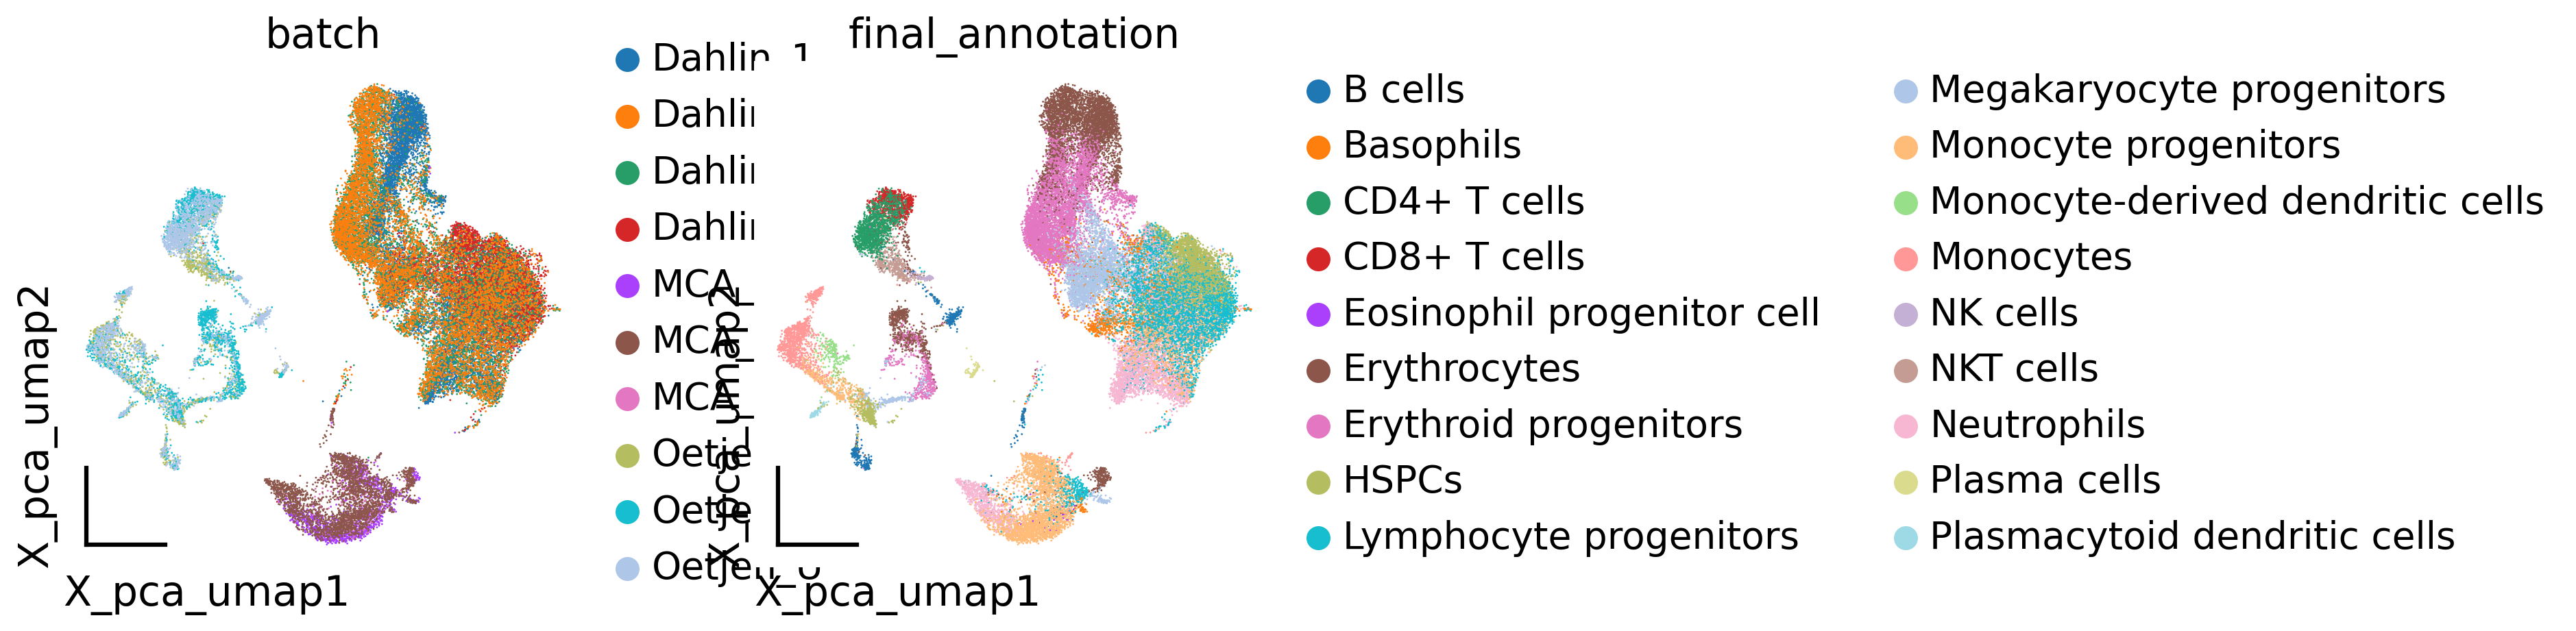

In [11]:
ov.utils.embedding(adata,
                basis='X_pca_umap',frameon='small',
                color=['batch','final_annotation'],show=False)

**`2.1 Harmony`**

In [12]:
adata_harmony=adata.copy()
ov.single.batch_correction(adata_harmony,batch_key='batch',
                                        methods='harmony',n_pcs=50)

...Begin using harmony to correct batch effect


2025-05-20 13:04:58,011 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-05-20 13:05:02,621 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-20 13:05:02,907 - harmonypy - INFO - Iteration 1 of 10
2025-05-20 13:05:19,873 - harmonypy - INFO - Iteration 2 of 10
2025-05-20 13:05:36,733 - harmonypy - INFO - Converged after 2 iterations


In [13]:
sc.pp.neighbors(
    adata_harmony,
    use_rep='X_harmony',
    key_added='harmony_neighbours'
)

sc.tl.umap(
    adata_harmony,
    neighbors_key='harmony_neighbours'
)

key_added = 'X_harmoney'
adata_harmony.obsm[f'{key_added}_umap'] = adata_harmony.obsm['X_umap'].copy()
print(adata_harmony)

AnnData object with n_obs × n_vars = 42290 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors', 'harmony_neighbours'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_neighbours_dista

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormappi

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_harmoney_umap1', ylabel='X_harmoney_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_harmoney_umap1', ylabel='X_harmoney_umap2'>]

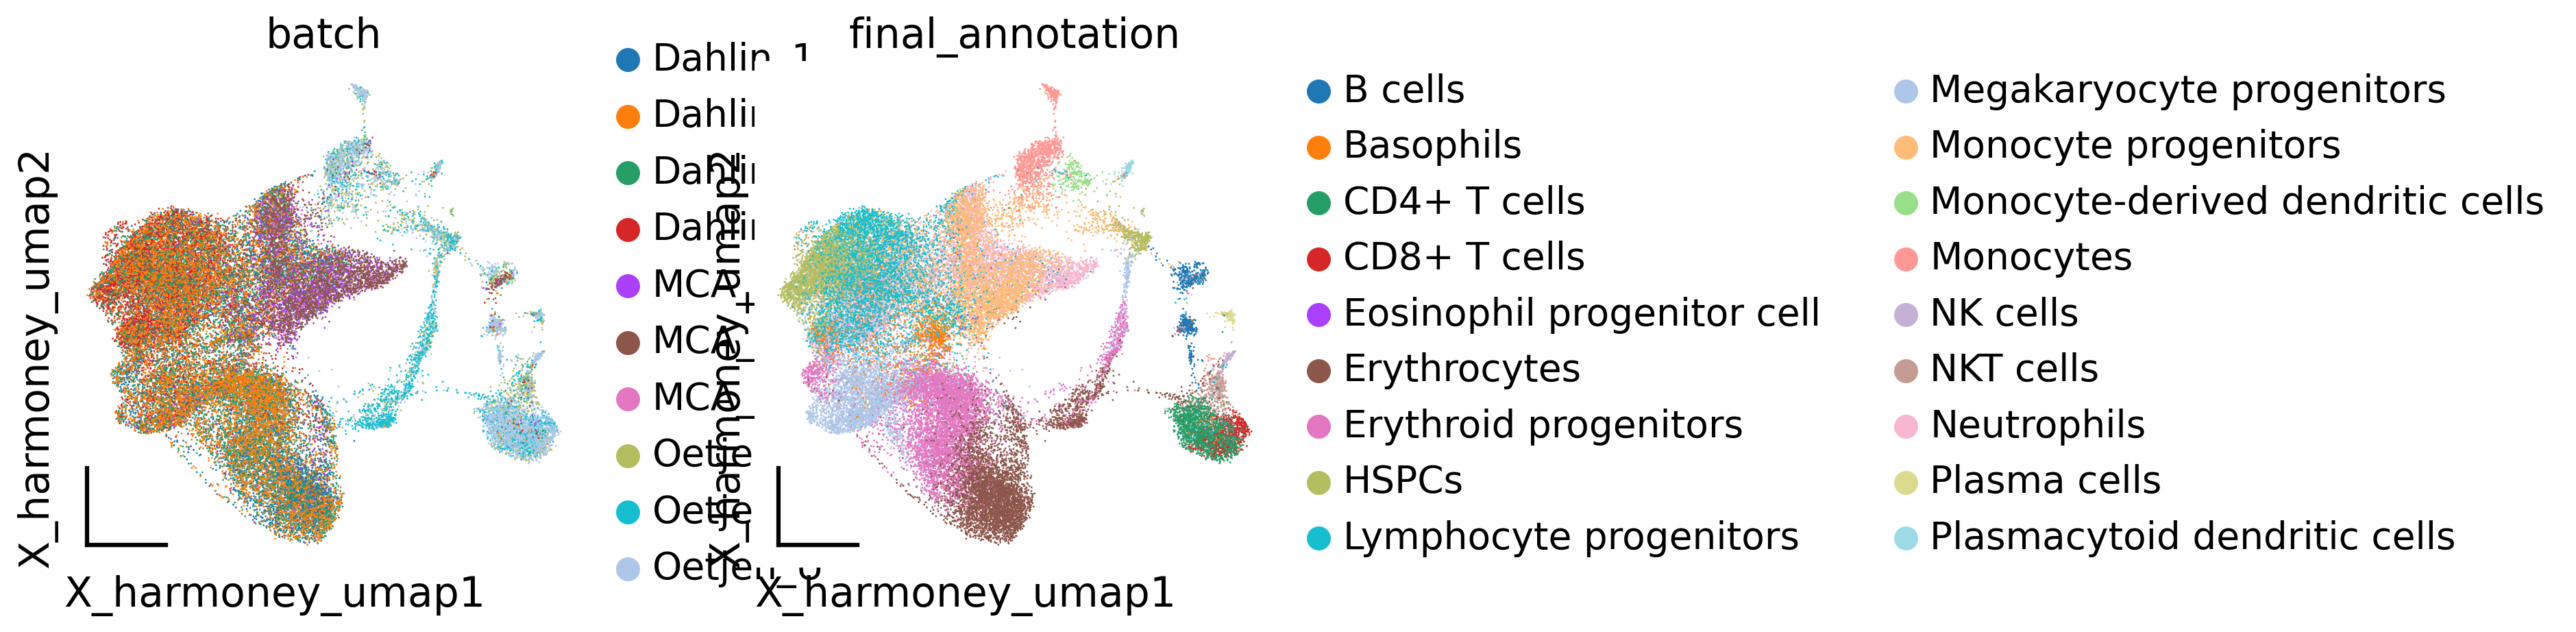

In [14]:
ov.utils.embedding(adata_harmony,
                basis='X_harmoney_umap',frameon='small',
                color=['batch','final_annotation'],show=False)

In [15]:
adata.obsm['X_harmony'] = adata_harmony.obsm['X_harmony'].copy()
adata.obsm['X_harmoney_umap'] = adata_harmony.obsm['X_harmoney_umap'].copy()
print(adata)

AnnData object with n_obs × n_vars = 42290 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_neighbours_distances', 'pca_neighbours

**`2.2 Scanorama`**

In [27]:
adata_scanorama=adata.copy()

In [28]:
batch_key = "batch"
label_key = "final_annotation"
adata_scanorama.layers["counts"] = adata_scanorama.X.copy()
sc.pp.highly_variable_genes(adata_scanorama, batch_key = batch_key)
# Select all genes that are variable in at least 2 batches
var_select = adata_scanorama.var.highly_variable_nbatches > 2
var_genes = var_select.index[var_select]

adatas = [adata_scanorama[adata_scanorama.obs[batch_key] == batch_value][:, var_genes].copy() for batch_value in adata_scanorama.obs[batch_key].unique()]

In [29]:
# adata_scanorama.layers["counts"] = adata_scanorama.X.copy()

# 将数据按 chemistry 分开
# batches = adata_scanorama.obs['study'].cat.categories.tolist()
# alldata = {}
# for batch in batches:
#     alldata[batch] = adata_scanorama[adata_scanorama.obs['study'] == batch, :]

# adatas = list(alldata.values())
scanorama.integrate_scanpy(adatas, dimred=40)
scanorama_int = [ad.obsm['X_scanorama'] for ad in adatas]
all_s = np.concatenate(scanorama_int)

adata_scanorama.obsm["X_scanorama"] = all_s

Found 601 genes among all datasets
[[0.00000000e+00 8.55587121e-01 8.78787879e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 6.46830530e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.48971193e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.44563553e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.49794239e-02
  2.09876543e-02 2.59259259e-02 1.64609053e-02 7.81893004e-02
  0.00000000e+00 1.81069959e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.92638366e-01 8.57708014e-01 7.92496172e-01 8.99094437e-02
  1.05263158e-02 8.88730892e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.44304138e-01 7.86270822e-01 1.29366106e-02
  0.00000000e+00 1.77746178e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 9.42178218e-01 4.98059508e-02
  5.26315789e-03 1.03092784e-02]
 [0.00000000e+00 0.0000

In [30]:
sc.pp.neighbors(
    adata_scanorama,
    use_rep='X_scanorama',
    key_added='scanorama_neighbours'
)

sc.tl.umap(
    adata_scanorama,
    neighbors_key='scanorama_neighbours'
)

key_added = 'X_scanorama'
adata_scanorama.obsm[f'{key_added}_umap'] = adata_scanorama.obsm['X_umap'].copy()
print(adata_scanorama)

AnnData object with n_obs × n_vars = 42290 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable', 'dispersions', 'dispersions_norm'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors', 'scanorama_neighbours'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap', 'X_scanorama', 'X_scanorama_umap'
    varm: 'PCs', 'scaled|original|pca_

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormappi

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_scanorama_umap1', ylabel='X_scanorama_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_scanorama_umap1', ylabel='X_scanorama_umap2'>]

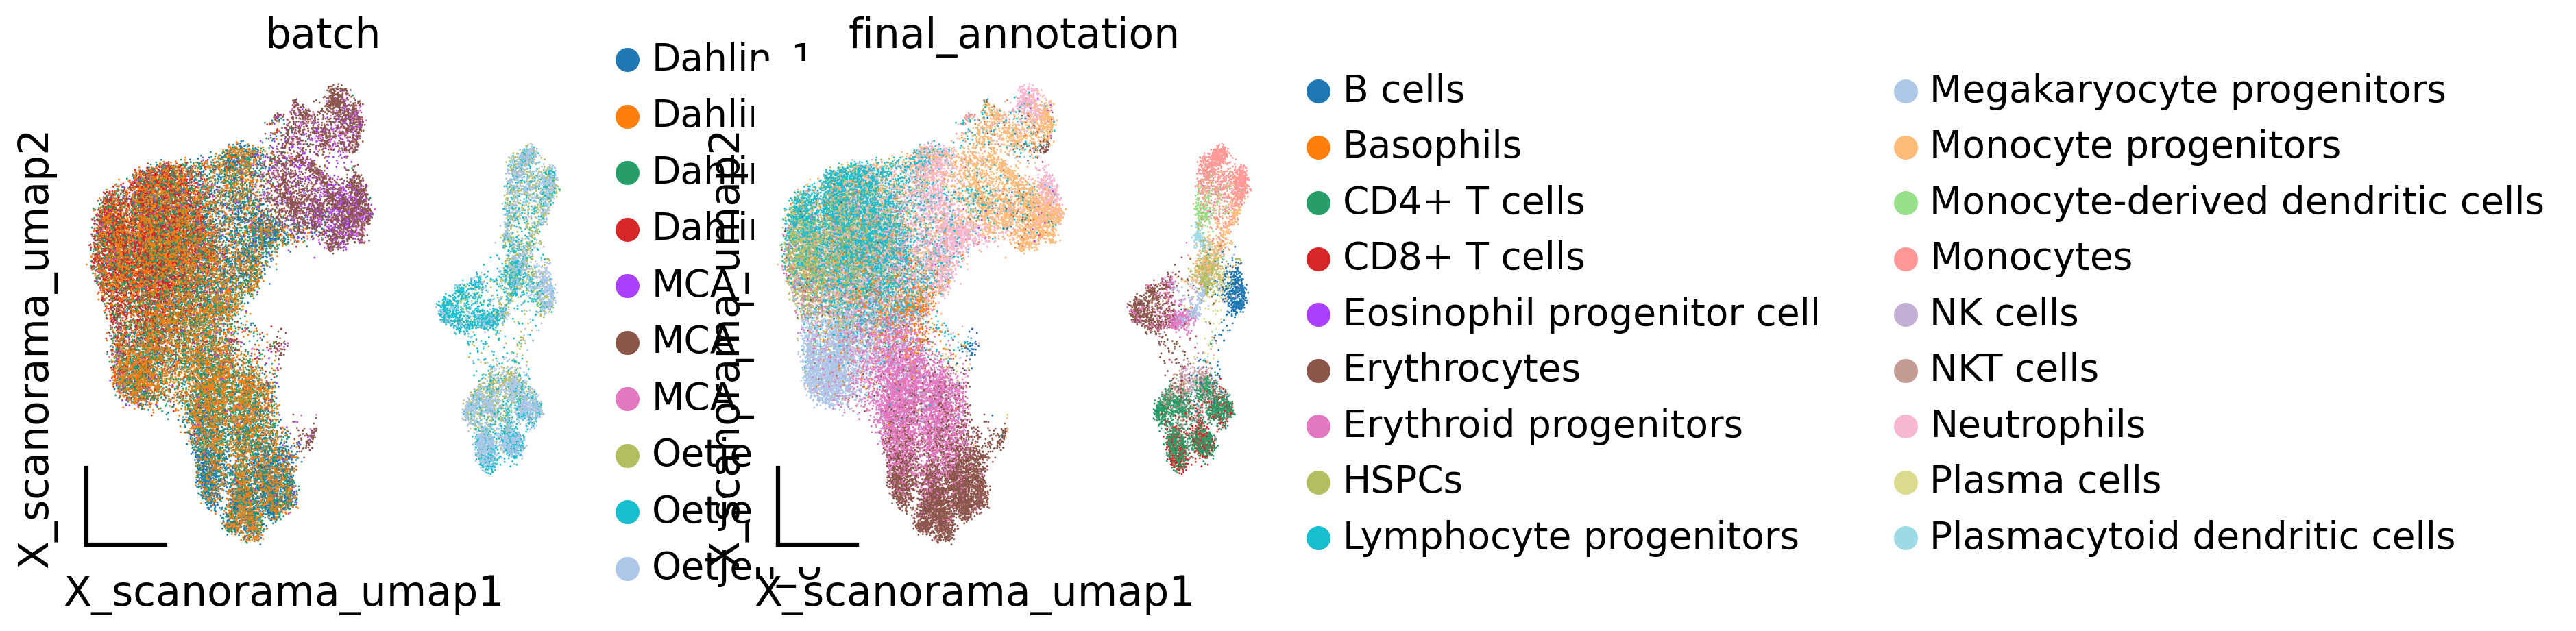

In [31]:
ov.utils.embedding(adata_scanorama,
                basis='X_scanorama_umap',frameon='small',
                color=['batch','final_annotation'],show=False)

In [32]:
adata.obsm['X_scanorama'] = adata_scanorama.obsm['X_scanorama'].copy()
adata.obsm['X_scanorama_umap'] = adata_scanorama.obsm['X_scanorama_umap'].copy()
print(adata)

AnnData object with n_obs × n_vars = 42290 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap', 'X_scanorama', 'X_scanorama_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 'scaled'
    obsp: 'pca_nei

**`2.3 scVI`**

In [33]:
adata_scVI=adata.copy()
scvi.model.SCVI.setup_anndata(adata_scVI, layer="counts", batch_key="batch")
vae = scvi.model.SCVI(adata_scVI, n_layers=2, n_latent=30, gene_likelihood="nb")
vae

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:63: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


SCVI model with the following parameters: 
n_hidden: 128, n_latent: 30, n_layers: 2, dropout_rate: 0.1, dispersion: gene, gene_likelihood: nb, 
latent_distribution: normal.
Training status: Not Trained
Model's adata is minified?: False

In [34]:
vae.train()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=255` in the `DataLoader` to improve performance.


Training:   0%|          | 0/189 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=189` reached.


In [35]:
print(vae)
print()
adata_scVI.obsm["X_scVI"] = vae.get_latent_representation()
print(adata_scVI)

SCVI model with the following parameters: 
n_hidden: 128, n_latent: 30, n_layers: 2, dropout_rate: 0.1, dispersion: gene, gene_likelihood: nb, 
latent_distribution: normal.
Training status: Trained
Model's adata is minified?: False



AnnData object with n_obs × n_vars = 42290 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', '_scvi_batch', '_scvi_labels'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap', 'X_scanorama', 'X_scanorama_umap', 'X_scVI'
    varm: 'PCs', '

In [36]:
sc.pp.neighbors(
    adata_scVI,
    use_rep='X_scVI',
    key_added='scVI_neighbours'
)

sc.tl.umap(
    adata_scVI,
    neighbors_key='scVI_neighbours'
)

key_added = 'X_scVI'
adata_scVI.obsm[f'{key_added}_umap'] = adata_scVI.obsm['X_umap'].copy()
print(adata_scVI)

AnnData object with n_obs × n_vars = 42290 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', '_scvi_batch', '_scvi_labels'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors', '_scvi_uuid', '_scvi_manager_uuid', 'scVI_neighbours'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap', 'X_scanorama', 'X_scanorama_umap', 'X_scVI', 

/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:1268: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(values) or values.dtype == bool:
/home/data/t050502/miniconda3/envs/omicverse/lib/python3.10/site-packages/omicverse/utils/_scatterplot.py:430: UserWarning: No data for colormappi

[<AxesSubplot: title={'center': 'batch'}, xlabel='X_scVI_umap1', ylabel='X_scVI_umap2'>,
 <AxesSubplot: title={'center': 'final_annotation'}, xlabel='X_scVI_umap1', ylabel='X_scVI_umap2'>]

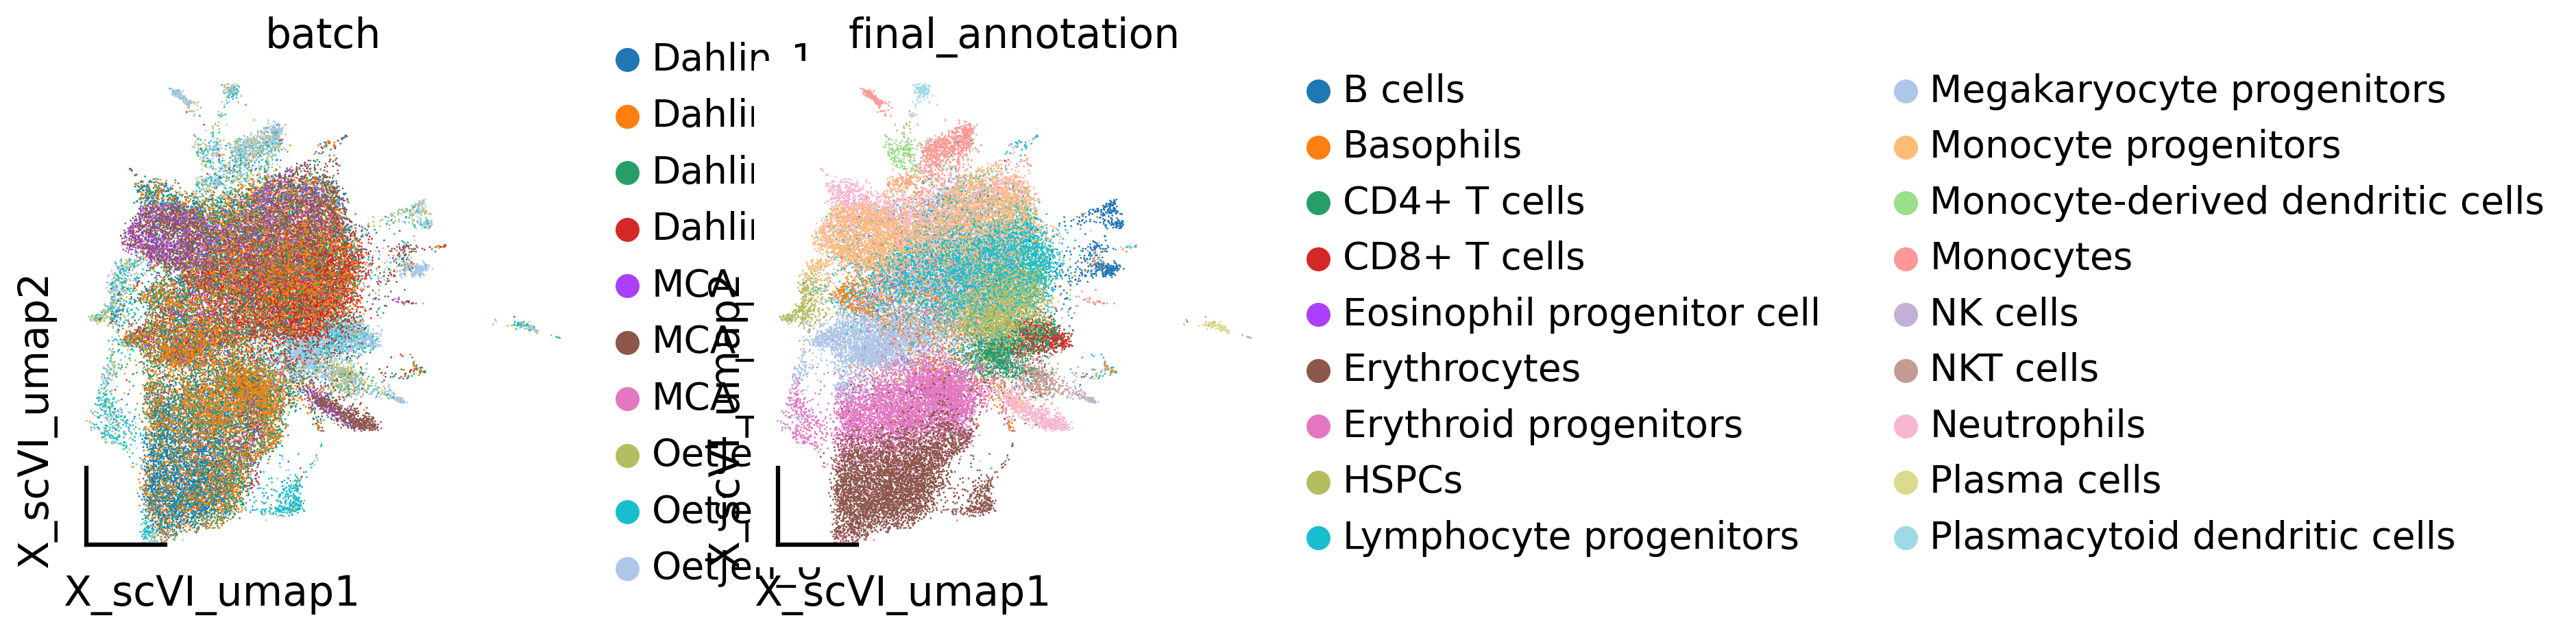

In [37]:
ov.utils.embedding(adata_scVI,
                basis='X_scVI_umap',frameon='small',
                color=['batch','final_annotation'],show=False)

In [38]:
adata.obsm['X_scVI'] = adata_scVI.obsm['X_scVI'].copy()
adata.obsm['X_scVI_umap'] = adata_scVI.obsm['X_scVI_umap'].copy()
print(adata)

AnnData object with n_obs × n_vars = 42290 × 2000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features', 'highly_variable'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap', 'X_scanorama', 'X_scanorama_umap', 'X_scVI', 'X_scVI_umap'
    varm: 'PCs', 'scaled|original|pca_loadings'
    layers: 'counts', 's

In [39]:
import joblib
joblib.dump(vae, '../Data/Immune_human_mouse/human_mouse_boneaorrow_10_sample_scVI_model.pkl')
# model = joblib.load('model.pkl')

['../Data/Immune_human_mouse/human_mouse_boneaorrow_10_sample_scVI_model.pkl']

In [40]:
adata = adata.raw.to_adata()
print(adata)
print()
print(adata.X.shape)

obs_df = adata.obs.copy()
for col in obs_df.columns:
    if obs_df[col].dtype.name == "category":
        obs_df[col] = obs_df[col].astype("object")
adata.obs = obs_df

AnnData object with n_obs × n_vars = 42290 × 8135
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes'
    var: 'mt', 'n_cells', 'percent_cells', 'robust', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable_features'
    uns: 'scrublet', 'log1p', 'hvg', 'pca', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'pca_neighbours', 'umap', 'batch_colors', 'final_annotation_colors'
    obsm: 'X_pca', 'scaled|original|X_pca', 'X_umap', 'X_pca_umap', 'X_harmony', 'X_harmoney_umap', 'X_scanorama', 'X_scanorama_umap', 'X_scVI', 'X_scVI_umap'
    obsp: 'pca_neighbours_distances', 'pca_neighbours_connectivities'

(42290, 8135)


In [41]:
adata.obs.dtypes

batch                 object
chemistry             object
data_type             object
dpt_pseudotime       float32
final_annotation      object
mt_frac              float32
n_counts             float32
n_genes                int64
size_factors         float64
species               object
study                 object
tissue                object
nUMIs                float32
mito_perc            float32
detected_genes         int32
cell_complexity      float64
doublet_score        float64
predicted_doublet       bool
passing_mt              bool
passing_nUMIs           bool
passing_ngenes          bool
dtype: object

In [42]:
adata.write_h5ad('../Data/Immune_human_mouse/human_mouse_boneaorrow_10_sample_integration_harmony_scanorama_scVI.h5ad', convert_strings_to_categoricals = False)

**`Run seurat cca rpca in R `**

**`Load Package`**

In [1]:
# load function
source('./Seurat_Function.R')
# load package
options(stringsAsFactors = F)
for(i in pg){suppressMessages(library(i, character.only = T))}
# set memery and core number
options(future.globals.maxSize = 20 * 1024^3) 
plan(multicore, workers = 12)

## `2. Integration with Seurat`

**`Load h5ad Data and convert to seurat`**

In [2]:
getAnywhere(convert_h5ad_to_seuratv5)

A single object matching ‘convert_h5ad_to_seuratv5’ was found
It was found in the following places
  .GlobalEnv
with value

function (h5ad_path = "", output_dir = "", prefix_name = "", 
    include_all_assays = FALSE, save = TRUE, verbose = TRUE) 
{
    if (!file.exists(h5ad_path)) 
        stop("The specified .h5ad file does not exist.")
    if (!dir.exists(output_dir)) 
        stop("The specified output directory does not exist.")
    if (is.null(prefix_name) || prefix_name == "") 
        stop("The 'prefix_name' argument is missing or empty.")
    base_name <- tools::file_path_sans_ext(basename(h5ad_path))
    h5seurat_path <- sub("\\.h5ad$", ".h5seurat", h5ad_path)
    if (verbose) 
        cat("Converting .h5ad to .h5seurat...\n")
    Convert(h5ad_path, dest = "h5seurat", overwrite = TRUE, assay = "RNA", 
        filename = h5seurat_path)
    if (verbose) 
        cat("Detecting available assays...\n")
    get_available_assays <- function(h5seurat_path) {
        h5_structure <- 

In [2]:
h5ad_path = '../Data/Immune_human_mouse/human_mouse_boneaorrow_10_sample_integration_harmony_scanorama_scVI.h5ad'

obj <- convert_h5ad_to_seuratv5(h5ad_path = h5ad_path,
    output_dir = '../Data/raw_seurat/',
    prefix_name = 'human_mouse_boneaorrow_10_sample_integration_harmony_scanorama_scVI',
    include_all_assays = TRUE,
    save = TRUE,
    verbose = TRUE
)

Converting .h5ad to .h5seurat...


Warning message:
“Unknown file type: h5ad”
Creating h5Seurat file for version 3.1.5.9900

Adding X as data

Adding X as counts

Adding meta.features from var

Adding X_harmoney_umap as cell embeddings for harmoney_umap

Adding X_harmony as cell embeddings for harmony

Adding X_pca as cell embeddings for pca

Adding X_pca_umap as cell embeddings for pca_umap

Adding X_scVI as cell embeddings for scVI

Adding X_scVI_umap as cell embeddings for scVI_umap

Adding X_scanorama as cell embeddings for scanorama

Adding X_scanorama_umap as cell embeddings for scanorama_umap

Adding X_umap as cell embeddings for umap

Adding scaled|original|X_pca as cell embeddings for scaled|original|X_pca

Adding miscellaneous information for pca

Adding standard deviations for pca

Adding miscellaneous information for umap

Adding batch_colors to miscellaneous data

Adding final_annotation_colors to miscellaneous data

Adding hvg to miscellaneous data

Adding log1p to miscellaneous data

Adding pca_neighbours

Detecting available assays...
Found assays: RNA 


Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding feature-level metadata for RNA

Adding reduction harmoney_umap

Adding cell embeddings for harmoney_umap

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from harmoney_umap_ to harmoneyumap_”
Adding miscellaneous information for harmoney_umap

Adding reduction harmony

Adding cell embeddings for harmony

Adding miscellaneous information for harmony

Adding reduction pca

Adding cell embeddings for pca

Adding miscellaneous information for pca

Adding reduction pca_umap

Adding cell embeddings for pca_umap

Adding miscellaneous information for pca_umap

Warning message:
“Key ‘PC_’ taken, using ‘pcaumap_’ instead”
Adding reduction scVI

Adding cell embeddings for scVI

Adding miscellaneous information for scVI

Adding reduction scVI_umap

Adding cell embeddings for scVI_umap

Warning message:
“Keys should be one or more alphanumeric characters fo

Converting assays to Seurat v5 Assay5 format...


Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc ‘harmoney_umap’

Updating matrix keys for DimReduc ‘harmony’

Updating matrix keys for DimReduc ‘pca’

Updating matrix keys for DimReduc ‘pca_umap’

Updating matrix keys for DimReduc ‘scVI’

Updating matrix keys for DimReduc ‘scVI_umap’

Updating matrix keys for DimReduc ‘scaled.original.X_pca’

Updating matrix keys for DimReduc ‘scanorama’

Updating matrix keys for DimReduc ‘scanorama_umap’

Updating matrix keys for DimReduc ‘umap’

Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in harmoney_umap

Setting harmoney_umap DimReduc to global

Updating slots in harmony

Updating slots in pca

Updating slots in pca_umap

Setting pca_umap DimReduc to global

Updating slots in scVI

Updating slots in scVI_umap

Setting scVI_umap DimReduc to global

Updating slots in scaled.origi

Saved Seurat v5 object to: ../Data/raw_seurat//human_mouse_boneaorrow_10_sample_integration_harmony_scanorama_scVI_v5.rds 
Conversion complete. Returning Seurat v5 object.
Removing temporary file: ../Data/Immune_human_mouse/human_mouse_boneaorrow_10_sample_integration_harmony_scanorama_scVI.h5seurat 


**`2.4 CCA RPCA`**

In [3]:
obj <- readRDS("../Data/raw_seurat/human_mouse_boneaorrow_10_sample_integration_harmony_scanorama_scVI_v5.rds")

In [4]:
obj[["RNA"]] <- split(obj[["RNA"]], f = obj$batch)
obj

An object of class Seurat 
8135 features across 42290 samples within 1 assay 
Active assay: RNA (8135 features, 0 variable features)
 20 layers present: counts.Oetjen_A, counts.Oetjen_P, counts.Oetjen_U, counts.Dahlin_1, counts.Dahlin_4, counts.Dahlin_3, counts.Dahlin_2, counts.MCA_BM_1, counts.MCA_BM_3, counts.MCA_BM_2, data.Oetjen_A, data.Oetjen_P, data.Oetjen_U, data.Dahlin_1, data.Dahlin_4, data.Dahlin_3, data.Dahlin_2, data.MCA_BM_1, data.MCA_BM_3, data.MCA_BM_2
 10 dimensional reductions calculated: harmoney_umap, harmony, pca, pca_umap, scVI, scVI_umap, scaled.original.X_pca, scanorama, scanorama_umap, umap

In [5]:
obj <- NormalizeData(obj)
obj <- FindVariableFeatures(obj)
obj <- ScaleData(obj)
# obj <- RunPCA(obj)

Normalizing layer: counts.Oetjen_A

Normalizing layer: counts.Oetjen_P

Normalizing layer: counts.Oetjen_U

Normalizing layer: counts.Dahlin_1

Normalizing layer: counts.Dahlin_4

Normalizing layer: counts.Dahlin_3

Normalizing layer: counts.Dahlin_2

Normalizing layer: counts.MCA_BM_1

Normalizing layer: counts.MCA_BM_3

Normalizing layer: counts.MCA_BM_2

Finding variable features for layer counts.Oetjen_A

Finding variable features for layer counts.Oetjen_P

Finding variable features for layer counts.Oetjen_U

Finding variable features for layer counts.Dahlin_1

Finding variable features for layer counts.Dahlin_4

Finding variable features for layer counts.Dahlin_3

Finding variable features for layer counts.Dahlin_2

Finding variable features for layer counts.MCA_BM_1

Finding variable features for layer counts.MCA_BM_3

Finding variable features for layer counts.MCA_BM_2

Centering and scaling data matrix



In [6]:
obj <- IntegrateLayers(
  object = obj, method = CCAIntegration,
  orig.reduction = "pca", new.reduction = "cca",
  verbose = FALSE
)

Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”


In [7]:
obj <- IntegrateLayers(
  object = obj, method = RPCAIntegration,
  orig.reduction = "pca", new.reduction = "rpca",
  verbose = FALSE
)

Warning message in size + sum(size_args, na.rm = FALSE):
“NAs produced by integer overflow”


In [8]:
obj <- RunUMAP(obj, reduction = "cca", dims = 1:30, reduction.name = "cca_umap")
obj <- RunUMAP(obj, reduction = "rpca", dims = 1:30, reduction.name = "rpca_umap")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:05:56 UMAP embedding parameters a = 0.9922 b = 1.112

14:05:56 Read 42290 rows and found 30 numeric columns

14:05:56 Using Annoy for neighbor search, n_neighbors = 30

14:05:57 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:06:03 Writing NN index file to temp file /tmp/Rtmp9km6O8/file3a4a782ae9f1f6

14:06:03 Searching Annoy index using 12 threads, search_k = 3000

14:06:06 Annoy recall = 100%

14:06:09 Commencing smooth kNN distance calibration using 12 threads
 with target n_neig

In [9]:
obj

An object of class Seurat 
8135 features across 42290 samples within 1 assay 
Active assay: RNA (8135 features, 2000 variable features)
 21 layers present: counts.Oetjen_A, counts.Oetjen_P, counts.Oetjen_U, counts.Dahlin_1, counts.Dahlin_4, counts.Dahlin_3, counts.Dahlin_2, counts.MCA_BM_1, counts.MCA_BM_3, counts.MCA_BM_2, data.Oetjen_A, data.Oetjen_P, data.Oetjen_U, data.Dahlin_1, data.Dahlin_4, data.Dahlin_3, data.Dahlin_2, data.MCA_BM_1, data.MCA_BM_3, data.MCA_BM_2, scale.data
 14 dimensional reductions calculated: harmoney_umap, harmony, pca, pca_umap, scVI, scVI_umap, scaled.original.X_pca, scanorama, scanorama_umap, umap, cca, rpca, cca_umap, rpca_umap

In [10]:
saveRDS(obj,"../Data/raw_seurat/human_mouse_boneaorrow_10_sample_integration_harmony_scanorama_scVI_cca_rpca_v5.rds")

In [11]:
write.csv(Embeddings(obj[["cca"]]), file = "../Data/raw_seurat/human_mouse_boneaorrow_10_sample_cca_pca.csv")
write.csv(Embeddings(obj[["rpca"]]), file = "../Data/raw_seurat/human_mouse_boneaorrow_10_sample_rpca_pca.csv")
write.csv(Embeddings(obj[["cca_umap"]]), file = "../Data/raw_seurat/human_mouse_boneaorrow_10_sample_cca_umap.csv")
write.csv(Embeddings(obj[["rpca_umap"]]), file = "../Data/raw_seurat/human_mouse_boneaorrow_10_sample_rpca_umap.csv")

**`3. Visualization`**

In [22]:
obj <- readRDS("../Data/raw_seurat/human_mouse_boneaorrow_10_sample_integration_harmony_scanorama_scVI_cca_rpca_v5.rds")
obj

An object of class Seurat 
8135 features across 42290 samples within 1 assay 
Active assay: RNA (8135 features, 2000 variable features)
 21 layers present: counts.Oetjen_A, counts.Oetjen_P, counts.Oetjen_U, counts.Dahlin_1, counts.Dahlin_4, counts.Dahlin_3, counts.Dahlin_2, counts.MCA_BM_1, counts.MCA_BM_3, counts.MCA_BM_2, data.Oetjen_A, data.Oetjen_P, data.Oetjen_U, data.Dahlin_1, data.Dahlin_4, data.Dahlin_3, data.Dahlin_2, data.MCA_BM_1, data.MCA_BM_3, data.MCA_BM_2, scale.data
 14 dimensional reductions calculated: harmoney_umap, harmony, pca, pca_umap, scVI, scVI_umap, scaled.original.X_pca, scanorama, scanorama_umap, umap, cca, rpca, cca_umap, rpca_umap

In [23]:
obj@meta.data$celltype <- factor(
  obj@meta.data$final_annotation,
  levels = c("HSPCs","Monocyte progenitors","Monocytes",
                "Monocyte-derived dendritic cells","Plasmacytoid dendritic cells", 
                "Erythroid progenitors", "Megakaryocyte progenitors", "Erythrocytes",
                "CD4+ T cells", "CD8+ T cells","NKT cells",  "NK cells",
                "Lymphocyte progenitors", "B cells", 
                "Neutrophils",  "Basophils", "Eosinophil progenitor cell",
                "Plasma cells"
))
palette_clusters <- c(
  "#20b2aa","#e88ebf","#e01276", 
  "#f6f7a1", "#dbc902", 
  "#5a95d1", "#ff7f00","#e01212", 
  "#1cad15", "#b2df8a","#87a86a", '#3e8c3b',
  "#e6b000",  "#a37d00", 
  "#ffe4ca", '#F3B1A0','#F1BB72',
  "#995202"
)

In [24]:
obj@meta.data$batch <- recode(
  obj@meta.data$batch,
  'Oetjen_A' = 'Oetjen_A (human)',
  'Oetjen_P' = 'Oetjen_P (human)',
  'Oetjen_U' = 'Oetjen_U (human)',
  'Dahlin_1' = 'Dahlin_1 (mice)',
  'Dahlin_2' = 'Dahlin_2 (mice)',
  'Dahlin_3' = 'Dahlin_3 (mice)',
  'Dahlin_4' = 'Dahlin_4 (mice)',
  'MCA_BM_1' = 'MCA_BM_1 (mice)',
  'MCA_BM_2' = 'MCA_BM_2 (mice)',
  'MCA_BM_3' = 'MCA_BM_3 (mice)'
)

obj@meta.data$batch <- factor(
  obj@meta.data$batch,
  levels = c(
    'Oetjen_A (human)', 'Oetjen_P (human)', 'Oetjen_U (human)',
    'Dahlin_1 (mice)', 'Dahlin_2 (mice)', 'Dahlin_3 (mice)', 'Dahlin_4 (mice)',
    'MCA_BM_1 (mice)', 'MCA_BM_2 (mice)', 'MCA_BM_3 (mice)'
  )
)

palette_batch <- c('#F7F398','#E4C755', '#E39A35',
  '#CCE0F5','#C1E6F3','#57C3F3','#5a95d1',
  '#e0f3db', '#a8ddb5','#1cad15'
)

In [25]:
# obj@meta.data$chemistry <- factor(
#   obj@meta.data$chemistry,
#   levels = c('v2_10X','v3_10X','10X','smart-seq2')
# )
# palette_tech <- c("#5a95d1","#20b2aa","#e01276","#ff7f00")

obj@meta.data$species <- recode(
  obj@meta.data$species,
  'Human' = 'Human',
  'Mouse' = 'Mice'
)

obj@meta.data$species <- factor(
  obj@meta.data$species,
  levels = c('Human','Mice')
)

palette_species <- c('#F7F398','#a8ddb5')

In [26]:
pca_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "pca_umap") + ggtitle("Unintegrated")

scanorama_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "scanorama_umap") + ggtitle("Scanorama (Latent space)")

scVI_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "scVI_umap") + ggtitle("scVI (Latent space)")

harmoney_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "harmoney_umap") + ggtitle("Harmony (Latent space)")

cca_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "cca_umap") + ggtitle("Seurat v3 CCA (Feature Matrix)")

rpca_umap <- DimPlot(obj,cols = palette_clusters, group.by = "celltype", reduction = "rpca_umap") + ggtitle("Seurat v3 RPCA (Feature Matrix)")


In [27]:
batch_pca_umap <- DimPlot(obj,cols = palette_batch, group.by = "batch", reduction = "pca_umap",pt.size = 0.1, alpha = c(0.6)) + ggtitle("Unintegrated")

batch_scanorama_umap <- DimPlot(obj, cols = palette_batch, group.by = "batch", reduction = "scanorama_umap",pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Scanorama (Latent space)")

batch_scVI_umap <- DimPlot(obj, cols = palette_batch, group.by = "batch", reduction = "scVI_umap",pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("scVI (Latent space)")

batch_harmoney_umap <- DimPlot(obj, cols = palette_batch, group.by = "batch", reduction = "harmoney_umap",pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Harmony (Latent space)")

batch_cca_umap <- DimPlot(obj, cols = palette_batch, group.by = "batch", reduction = "cca_umap",pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Seurat v3 CCA (Feature Matrix)")

batch_rpca_umap <- DimPlot(obj, cols = palette_batch, group.by = "batch", reduction = "rpca_umap",pt.size = 0.1, alpha = c(0.6)) + 
  ggtitle("Seurat v3 RPCA (Feature Matrix)")


In [28]:
species_pca_umap <- DimPlot(
  obj, group.by = "species", reduction = "pca_umap", 
  pt.size = 0.1, alpha = c(0.4), cols = palette_species
) + ggtitle("Unintegrated")

species_scanorama_umap <- DimPlot(
  obj, group.by = "species", reduction = "scanorama_umap", 
  pt.size = 0.1, alpha = c(0.4), cols = palette_species
) + ggtitle("Scanorama (Latent space)")

species_scVI_umap <- DimPlot(
  obj, group.by = "species", reduction = "scVI_umap", 
  pt.size = 0.1, alpha = c(0.4), cols = palette_species
) + ggtitle("scVI (Latent space)")

species_harmony_umap <- DimPlot(
  obj, group.by = "species", reduction = "harmoney_umap", 
  pt.size = 0.1, alpha = c(0.4), cols = palette_species
) + ggtitle("Harmony (Latent space)")

species_cca_umap <- DimPlot(
  obj, group.by = "species", reduction = "cca_umap", 
  pt.size = 0.1, alpha = c(0.4), cols = palette_species
) + ggtitle("Seurat v3 CCA (Feature Matrix)")

species_rpca_umap <- DimPlot(
  obj, group.by = "species", reduction = "rpca_umap", 
  pt.size = 0.1, alpha = c(0.4), cols = palette_species
) + ggtitle("Seurat v3 RPCA (Feature Matrix)")

In [29]:
library(cowplot)
library(ggplot2)
library(gridExtra)

get_legend <- function(myggplot) {
  tmp <- ggplotGrob(myggplot)
  legend <- gtable::gtable_filter(tmp, "guide-box")
  return(legend)
}

legend <- get_legend(rpca_umap)

plots_no_legend <- list(
  pca_umap + theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  scanorama_umap + theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  scVI_umap + theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  harmoney_umap + theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  cca_umap + theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank()),
  rpca_umap + theme(legend.position = "none",
                   axis.title = element_blank(),
                   axis.text = element_blank(),
                   axis.ticks = element_blank(),
                   axis.line = element_blank())
)

plot_row <- plot_grid(plotlist = plots_no_legend, nrow = 1, align = "h")
final_plot <- plot_grid(plot_row, legend, nrow = 1, rel_widths = c(5, 0.5))
ggsave("../Analysis/human_mouse_boneaorrow_10_sample_umap_by_celltype_no_axis.pdf", plot = final_plot, width = 25, height = 4)

In [30]:
batch_legend <- get_legend(batch_rpca_umap)

batch_plots_no_legend <- list(
  batch_pca_umap + theme(legend.position = "none",
                         axis.title = element_blank(),
                         axis.text = element_blank(),
                         axis.ticks = element_blank(),
                         axis.line = element_blank()),
  batch_scanorama_umap + theme(legend.position = "none",
                               axis.title = element_blank(),
                               axis.text = element_blank(),
                               axis.ticks = element_blank(),
                               axis.line = element_blank()),
  batch_scVI_umap + theme(legend.position = "none",
                          axis.title = element_blank(),
                          axis.text = element_blank(),
                          axis.ticks = element_blank(),
                          axis.line = element_blank()),
  batch_harmoney_umap + theme(legend.position = "none",
                              axis.title = element_blank(),
                              axis.text = element_blank(),
                              axis.ticks = element_blank(),
                              axis.line = element_blank()),
  batch_cca_umap + theme(legend.position = "none",
                         axis.title = element_blank(),
                         axis.text = element_blank(),
                         axis.ticks = element_blank(),
                         axis.line = element_blank()),
  batch_rpca_umap + theme(legend.position = "none",
                          axis.title = element_blank(),
                          axis.text = element_blank(),
                          axis.ticks = element_blank(),
                          axis.line = element_blank())
)

batch_plot_row <- plot_grid(plotlist = batch_plots_no_legend, nrow = 1, align = "h")

batch_final_plot <- plot_grid(batch_plot_row, batch_legend, nrow = 1, rel_widths = c(5, 0.5))

ggsave("../Analysis/human_mouse_boneaorrow_10_sample_umap_by_batch_no_axis.pdf",
       plot = batch_final_plot, width = 25, height = 4)


In [31]:
library(cowplot)
library(ggplot2)
library(gridExtra)

species_legend <- get_legend(species_rpca_umap)

species_plots_no_legend <- list(
  species_pca_umap + theme(legend.position = "none",
                        axis.title = element_blank(),
                        axis.text = element_blank(),
                        axis.ticks = element_blank(),
                        axis.line = element_blank()),
  species_scanorama_umap + theme(legend.position = "none",
                              axis.title = element_blank(),
                              axis.text = element_blank(),
                              axis.ticks = element_blank(),
                              axis.line = element_blank()),
  species_scVI_umap + theme(legend.position = "none",
                         axis.title = element_blank(),
                         axis.text = element_blank(),
                         axis.ticks = element_blank(),
                         axis.line = element_blank()),
  species_harmony_umap + theme(legend.position = "none",
                             axis.title = element_blank(),
                             axis.text = element_blank(),
                             axis.ticks = element_blank(),
                             axis.line = element_blank()),
  species_cca_umap + theme(legend.position = "none",
                        axis.title = element_blank(),
                        axis.text = element_blank(),
                        axis.ticks = element_blank(),
                        axis.line = element_blank()),
  species_rpca_umap + theme(legend.position = "none",
                         axis.title = element_blank(),
                         axis.text = element_blank(),
                         axis.ticks = element_blank(),
                         axis.line = element_blank())
)

species_plot_row <- plot_grid(plotlist = species_plots_no_legend, nrow = 1, align = "h")

species_final_plot <- plot_grid(species_plot_row, species_legend, nrow = 1, rel_widths = c(5, 0.6))

ggsave("../Analysis/human_mouse_boneaorrow_10_sample_umap_by_species_no_axis.pdf",
       plot = species_final_plot, width = 25, height = 4)


In [32]:
saveRDS(obj,"../Data/raw_seurat/human_mouse_boneaorrow_10_sample_visualization_v5.rds")

In [4]:
head(obj@meta.data)

batch    chemistry data_type dpt_pseudotime
AAACCTGCAGCGAACA-1-Oetjen_A Oetjen_A v2_10X    UMI       NaN           
AAACCTGCATGTCCTC-1-Oetjen_A Oetjen_A v2_10X    UMI       NaN           
AAACCTGGTCGACTGC-1-Oetjen_A Oetjen_A v2_10X    UMI       NaN           
AAACCTGGTCGCTTCT-1-Oetjen_A Oetjen_A v2_10X    UMI       NaN           
AAACCTGTCCCGACTT-1-Oetjen_A Oetjen_A v2_10X    UMI       NaN           
AAACGGGAGGGCACTA-1-Oetjen_A Oetjen_A v2_10X    UMI       NaN           
                            final_annotation mt_frac    n_counts n_genes
AAACCTGCAGCGAACA-1-Oetjen_A Monocytes        0.04796990 6379     1422   
AAACCTGCATGTCCTC-1-Oetjen_A CD4+ T cells     0.02492809 4172      814   
AAACCTGGTCGACTGC-1-Oetjen_A Monocytes        0.05190678 6608     1208   
AAACCTGGTCGCTTCT-1-Oetjen_A Monocytes        0.04171633 5034     1102   
AAACCTGTCCCGACTT-1-Oetjen_A NKT cells        0.04352176 3998      836   
AAACGGGAGGGCACTA-1-Oetjen_A Monocytes        0.04066334 4402      888   
                            size_factors species ⋯ mito_perc detected_genes
AAACCTGCAGCGAACA-1-Oetjen_A 0.9577191    Human   ⋯ 0         1422          
AAACCTGCATGTCCTC-1-Oetjen_A 0.4255316    Human   ⋯ 0          814          
AAACCTGGTCGACTGC-1-Oetjen_A 0.7731111    Human   ⋯ 0         1208          
AAACCTGGTCGCTTCT-1-Oetjen_A 0.6411876    Human   ⋯ 0         1102          
AAACCTGTCCCGACTT-1-Oetjen_A 0.4524260    Human   ⋯ 0          836          
AAACGGGAGGGCACTA-1-Oetjen_A 0.4854440    Human   ⋯ 0          888          
                            cell_complexity doublet_score predicted_doublet
AAACCTGCAGCGAACA-1-Oetjen_A 0.9521826       0.028200166   FALSE            
AAACCTGCATGTCCTC-1-Oetjen_A 0.6442005       0.009511615   FALSE            
AAACCTGGTCGACTGC-1-Oetjen_A 0.8342602       0.003866378   FALSE            
AAACCTGGTCGCTTCT-1-Oetjen_A 0.7660084       0.034493379   FALSE            
AAACCTGTCCCGACTT-1-Oetjen_A 0.6642019       0.009511615   FALSE            
AAACGGGAGGGCACTA-1-Oetjen_A 0.6664407       0.004682911   FALSE            
                            passing_mt passing_nUMIs passing_ngenes nCount_RNA
AAACCTGCAGCGAACA-1-Oetjen_A TRUE       TRUE          TRUE           8184.086  
AAACCTGCATGTCCTC-1-Oetjen_A TRUE       TRUE          TRUE           5167.709  
AAACCTGGTCGACTGC-1-Oetjen_A TRUE       TRUE          TRUE           7143.070  
AAACCTGGTCGCTTCT-1-Oetjen_A TRUE       TRUE          TRUE           6641.857  
AAACCTGTCCCGACTT-1-Oetjen_A TRUE       TRUE          TRUE           5287.226  
AAACGGGAGGGCACTA-1-Oetjen_A TRUE       TRUE          TRUE           5553.306  
                            nFeature_RNA
AAACCTGCAGCGAACA-1-Oetjen_A 1422        
AAACCTGCATGTCCTC-1-Oetjen_A  814        
AAACCTGGTCGACTGC-1-Oetjen_A 1208        
AAACCTGGTCGCTTCT-1-Oetjen_A 1102        
AAACCTGTCCCGACTT-1-Oetjen_A  836        
AAACGGGAGGGCACTA-1-Oetjen_A  888

In [31]:
unique(obj@meta.data$celltype)

[1] Monocytes                        CD4+ T cells                    
 [3] NKT cells                        HSPCs                           
 [5] Erythrocytes                     B cells                         
 [7] Plasmacytoid dendritic cells     Monocyte progenitors            
 [9] CD8+ T cells                     Monocyte-derived dendritic cells
[11] Plasma cells                     Erythroid progenitors           
[13] Megakaryocyte progenitors        NK cells                        
[15] Neutrophils                      Lymphocyte progenitors          
[17] Basophils                        Eosinophil progenitor cell      
18 Levels: HSPCs Monocyte progenitors ... Plasma cells